In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #支持多条语句一起输出

import pandas as pd
import matplotlib.pyplot as plt
import quantaxis_ext
import ploter
import talib
import numpy as np
import calculator
import settings

QUANTAXIS>> Expand macros in c:\program files\python37\lib\site-packages\macropy\core\hquotes.py
QUANTAXIS>> Finding macros in 'macropy.core.hquotes'
QUANTAXIS>> Importing macros from 'macropy.core.quotes' into 'macropy.core.hquotes'
QUANTAXIS>> Expand macros in c:\program files\python37\lib\site-packages\macropy\core\quotes.py
QUANTAXIS>> Finding macros in 'macropy.core.quotes'
QUANTAXIS>> Expand macros in c:\program files\python37\lib\site-packages\macropy\core\failure.py
QUANTAXIS>> Finding macros in 'macropy.core.failure'
QUANTAXIS>> Importing macros from 'macropy.core.hquotes' into 'macropy.core.failure'
QUANTAXIS>> failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "c:\program files\python37\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'
QUANTAXIS>> Expand macros in c:\program files\python37\lib\site-packages\scipy\__config__.py
QUANTAXIS

In [2]:
#设定绘图的默认大小
import matplotlib
matplotlib.rcParams["figure.figsize"]=[16,8]

#加载 seaborn，并且设置默认使用 seaborn
import seaborn as sns
sns.set()

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [16]:
#计算日收益
df=calculator.calc_daily_return('000002','000300','2018-01-01','2018-12-31')

In [17]:
df.head()
#日收益标准差，均值，中位数
df['000002'].std(),df['000002'].mean(),df['000002'].median()

,zs_000300,000002
date,,
2018-01-03,0.005869,-0.007064
2018-01-04,0.004237,0.024436
2018-01-05,0.002407,0.049517
2018-01-08,0.005173,0.035386
2018-01-09,0.007005,-0.004168


(0.02682198673248983, -0.0009325841906753285, -0.0031760441292355557)

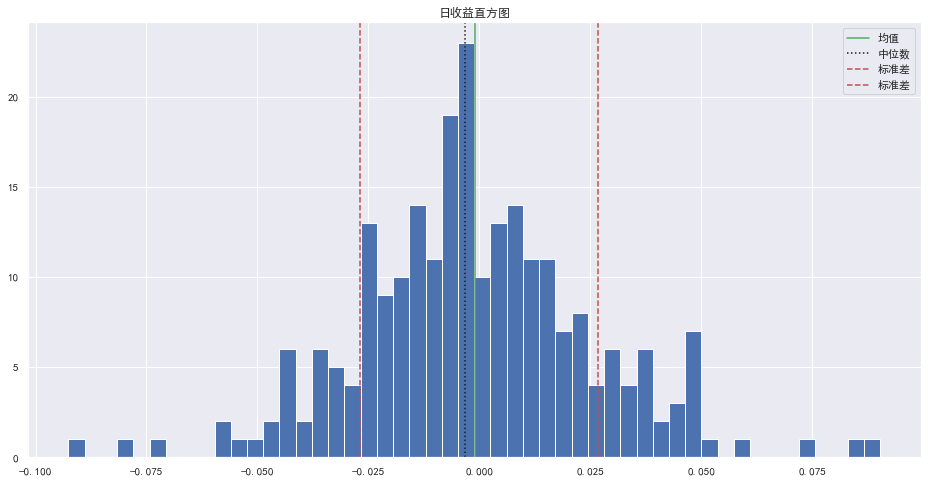

In [18]:
ploter.plot_daily_return_hist(df['000002'])

In [6]:
#后复权日数据
df_hfq=QA.QAFetch.QATushare.QA_fetch_get_stock_day('000002','2018-01-01','2018-12-31','02')

In [7]:
#前复权日数据
df_qfq=QA.QAFetch.QATushare.QA_fetch_get_stock_day('000002','2018-01-01','2018-12-31','01')

In [8]:
df_all=df[['close']].join(df_qfq[['close']],rsuffix='_qfq').join(df_hfq[['close']],rsuffix='_hfq')
df_all.head()

,close,close_qfq,close_hfq
date,,,
2018-01-02,32.56,31.336,3605.898
2018-01-03,32.33,31.114,3580.427
2018-01-04,33.12,31.875,3667.916
2018-01-05,34.76,33.453,3849.540
2018-01-08,35.99,34.637,3985.758


In [9]:
#计算日收益
df_all['daily_return']=df_all['close']/df_all['close'].shift(1)-1
df_all['daily_return_qfq']=df_all['close_qfq']/df_all['close_qfq'].shift(1)-1
df_all['daily_return_hfq']=df_all['close_hfq']/df_all['close_hfq'].shift(1)-1
df_all[['close','daily_return','close_qfq','daily_return_qfq','close_hfq','daily_return_hfq']].head()

,close,daily_return,close_qfq,daily_return_qfq,close_hfq,daily_return_hfq
date,,,,,,
2018-01-02,32.56,NaN,31.336,NaN,3605.898,NaN
2018-01-03,32.33,-0.007064,31.114,-0.007085,3580.427,-0.007064
2018-01-04,33.12,0.024436,31.875,0.024458,3667.916,0.024435
2018-01-05,34.76,0.049517,33.453,0.049506,3849.540,0.049517
2018-01-08,35.99,0.035386,34.637,0.035393,3985.758,0.035386


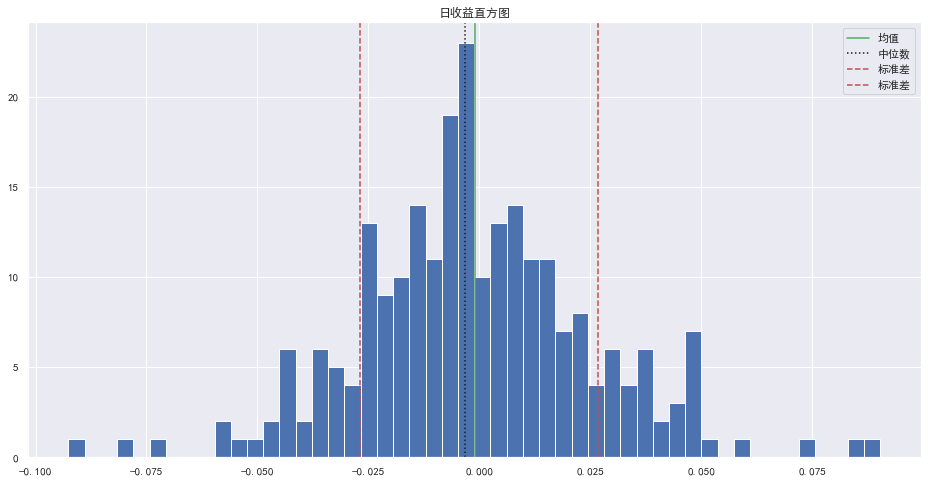

In [10]:
#使用直方图查看日收益
df_all['daily_return'].hist(bins=50)
#均值
mean = df_all['daily_return'].mean()
#中位数
median=df_all['daily_return'].median()
#标准差
std = df_all['daily_return'].std()
plt.axvline(mean, color='g',label='均值')
plt.axvline(median,color='k',linestyle=':',label='中位数')
plt.axvline(std,color='r',linestyle='--',label='标准差')
plt.axvline(-1*std,color='r',linestyle='--',label='标准差')
plt.title('日收益直方图')
plt.legend()

In [11]:
mean,std

(-0.0009325841906753285, 0.02682198673248983)

In [12]:
def plot_close_line_and_high(symbol,s,e,plot=True):
    df=QA.QAFetch.QATdx.QA_fetch_get_stock_day(symbol,s,e)
    #最高点
    m=df[df['close']==df['close'].max()]
#     print(m)
    # df['close'].plot(figsize=[18,5])
    if plot:
        plt.plot(df.index,df['close'],label='收盘价')
        plt.plot(m.index,m['close'],'-o', markersize=10,label='最高值 {0}'.format(m))
        plt.xticks(())
        plt.title('{0} ~ {1}间收盘价变化'.format(s,e))
        plt.legend()
    return df,m

---

[关于证券收益分布原因的讨论](https://www.ricequant.com/community/topic/126/)

[峰度（Kurtosis）和偏度（Skewness） - 吴锐的博文](http://blog.sciencenet.cn/blog-3083238-1057463.html)

[峰度 - 维基百科](https://zh.wikipedia.org/wiki/%E5%B3%B0%E5%BA%A6)

在统计学中，峰度（Kurtosis）衡量实数随机变量概率分布的峰态。峰度高就意味着方差增大是由低频度的大于或小于平均值的极端差值引起的。

[偏度 - 维基百科](https://zh.wikipedia.org/wiki/%E5%81%8F%E5%BA%A6)

* 偏度为负（负偏态）就意味着在概率密度函数左侧的尾部比右侧的长，绝大多数的值（不一定包括中位数在内[1]）位于平均值的右侧。

* 偏度为正（正偏态）就意味着在概率密度函数右侧的尾部比左侧的长，绝大多数的值（不一定包括中位数[1]）位于平均值的左侧。

* 偏度为零就表示数值相对均匀地分布在平均值的两侧，但不一定意味着其为对称分布。

---
## 2006~2009 之间一波上涨和下跌区间的峰度和偏度

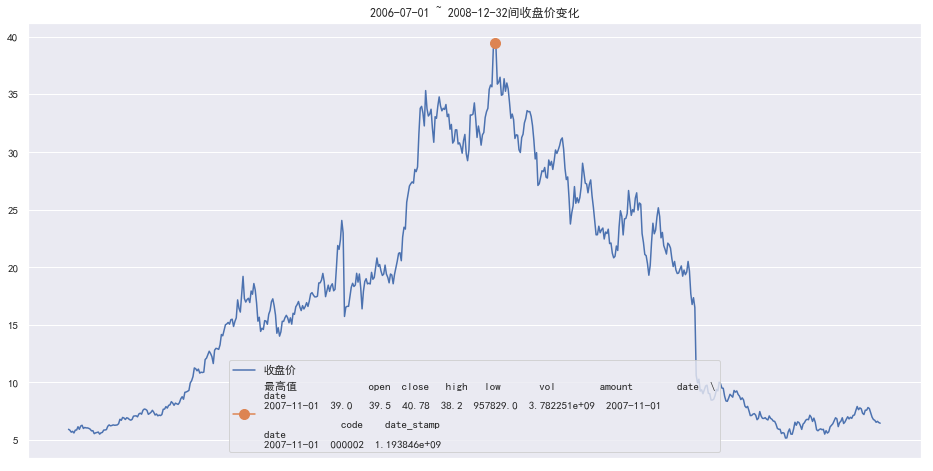

In [143]:
df,m=plot_close_line_and_high('000002','2006-07-01','2008-12-32')

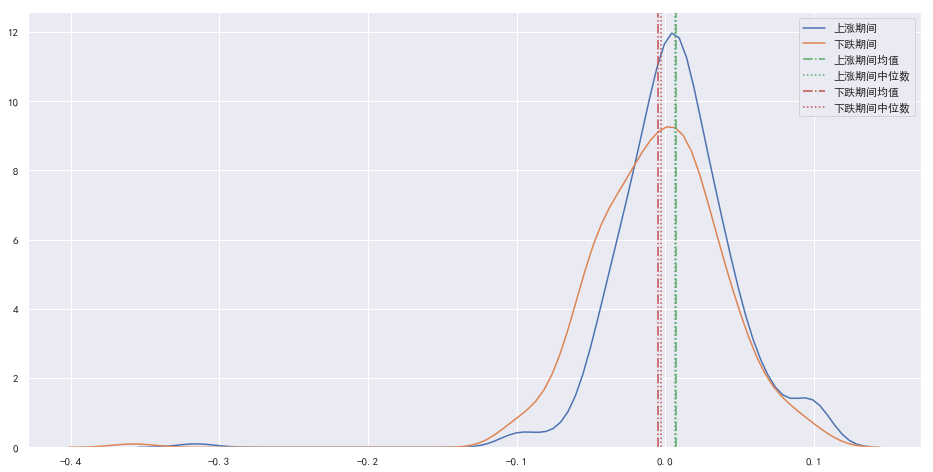

In [95]:
df['daily_return']=df['close']/df['close'].shift(1)-1
sns.kdeplot(df.loc[:'2007-11-01','daily_return'].dropna(),label='上涨期间')
sns.kdeplot(df.loc['2007-11-01':,'daily_return'].dropna(),label='下跌期间')
plt.axvline(df.loc[:'2007-11-01','daily_return'].mean(),color='g',linestyle='-.',label='上涨期间均值')
plt.axvline(df.loc[:'2007-11-01','daily_return'].median(),color='g',linestyle=':',label='上涨期间中位数')
plt.axvline(df.loc['2007-11-01':,'daily_return'].mean(),color='r',linestyle='-.',label='下跌期间均值')
plt.axvline(df.loc['2007-11-01':,'daily_return'].median(),color='r',linestyle=':',label='下跌期间中位数')
plt.legend()

In [92]:
print('上涨区间 峰度：{0}。'.format(df.loc[:'2007-11-01','daily_return'].kurtosis()))
print('上涨区间 偏度：{0}。'.format(df.loc[:'2007-11-01','daily_return'].skew()))
print('上涨区间 均值：{0}。'.format(df.loc[:'2007-11-01','daily_return'].mean()))
print('上涨区间 中位数：{0}。'.format(df.loc[:'2007-11-01','daily_return'].median()))
print('上涨期间 均值>中位数 {0}'.format(df.loc[:'2007-11-01','daily_return'].mean()>df.loc[:'2007-11-01','daily_return'].median()))
print('---')
print('下跌区间 峰度：{0}。'.format(df.loc['2007-11-01':,'daily_return'].kurtosis()))
print('下跌区间 偏度：{0}。'.format(df.loc['2007-11-01':,'daily_return'].skew()))
print('下跌区间 均值：{0}。'.format(df.loc['2007-11-01':,'daily_return'].mean()))
print('下跌区间 中位数：{0}。'.format(df.loc['2007-11-01':,'daily_return'].median()))
print('下跌区间 均值>中位数 {0}'.format(df.loc['2007-11-01':,'daily_return'].mean()>df.loc['2007-11-01':,'daily_return'].median()))

上涨区间 峰度：12.08217610931427。
上涨区间 偏度：-1.3735609279118486。
上涨区间 均值：0.0069100996668217595。
上涨区间 中位数：0.0063482466747279975。
上涨期间 均值>中位数 True
---
下跌区间 峰度：11.81778599066152。
下跌区间 偏度：-1.546386375959477。
下跌区间 均值：-0.005165490358187737。
下跌区间 中位数：-0.002996390864037912。
下跌区间 均值>中位数 False


---
## 2017~2019 之间一波上涨和下跌区间的峰度和偏度

            open  close   high    low       vol        amount        date  \
date                                                                        
2018-01-24  40.7  41.13  42.24  40.46  542629.0  2.236497e+09  2018-01-24   

              code    date_stamp  
date                              
2018-01-24  000002  1.516723e+09  


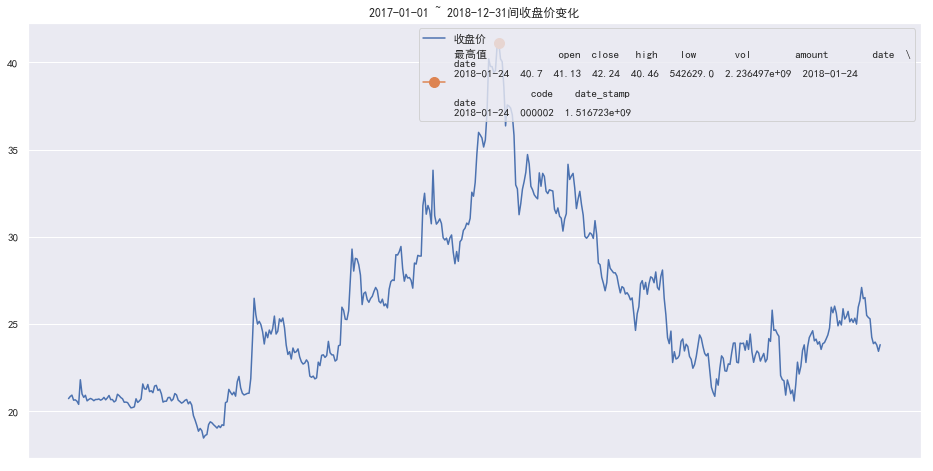

In [141]:
df,m=plot_close_line_and_high('000002','2017-01-01','2018-12-31')

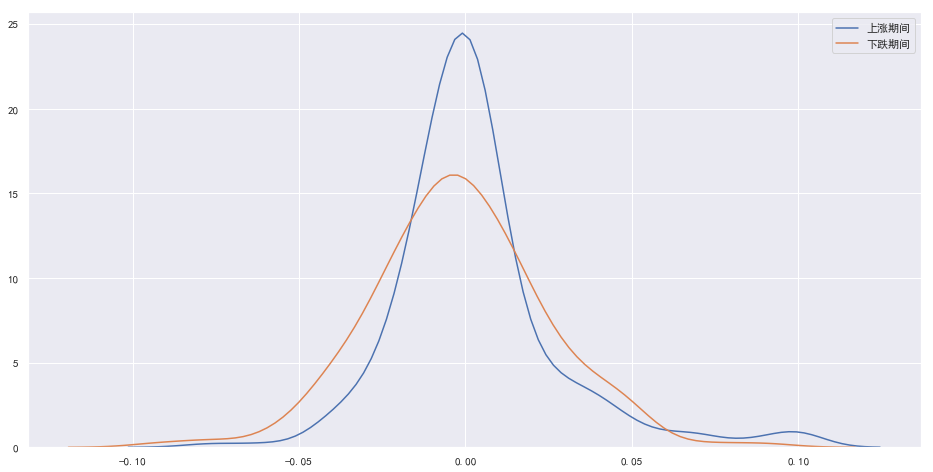

In [63]:
df['daily_return']=df['close']/df['close'].shift(1)-1
sns.kdeplot(df.loc[:'2018-01-24','daily_return'].dropna(),label='上涨期间')
sns.kdeplot(df.loc['2018-01-24':,'daily_return'].dropna(),label='下跌期间')

In [64]:
print('上涨区间 峰度：{0}。'.format(df.loc[:'2018-01-24','daily_return'].kurtosis()))
print('下跌区间 峰度：{0}。'.format(df.loc['2018-01-24':,'daily_return'].kurtosis()))

print('上涨区间 偏度：{0}。'.format(df.loc[:'2018-01-24','daily_return'].skew()))
print('下跌区间 偏度：{0}。'.format(df.loc['2018-01-24':,'daily_return'].skew()))

上涨区间 峰度：4.210246215508908。
下跌区间 峰度：0.9439094206521861。
上涨区间 偏度：1.3622874835741503。
下跌区间 偏度：0.04918434437032434。


---
## 2015~2019 之间震荡区间及一波上涨和下跌区间的峰度和偏度

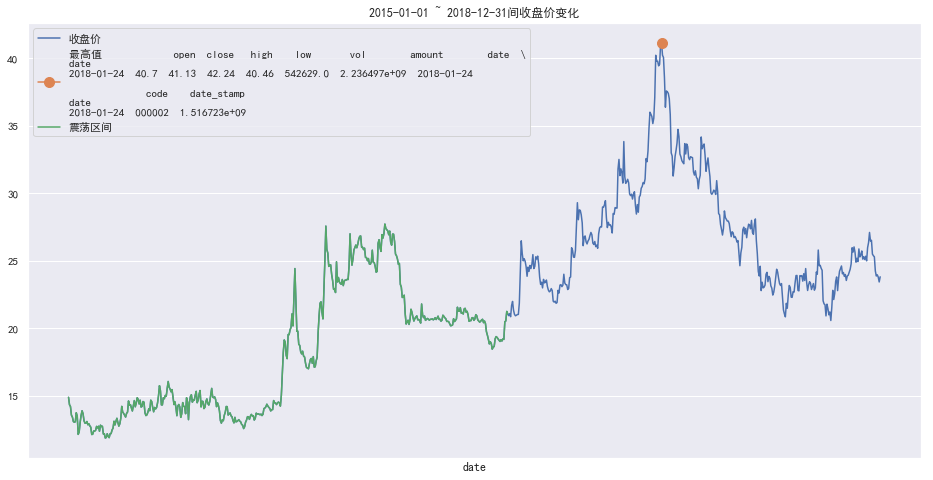

In [161]:
df,m=plot_close_line_and_high('000002','2015-01-01','2018-12-31')
df.loc[:'2017-06-01','close'].plot(label='震荡区间')
plt.legend()

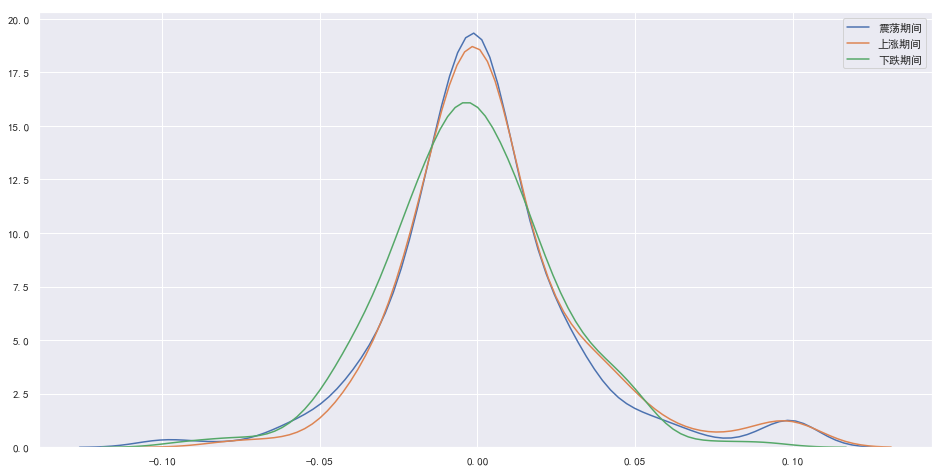

In [163]:
df['daily_return']=df['close']/df['close'].shift(1)-1
sns.kdeplot(df.loc[:'2017-06-01','daily_return'].dropna(),label='震荡期间')
sns.kdeplot(df.loc['2017-06-01':'2018-01-24','daily_return'].dropna(),label='上涨期间')
sns.kdeplot(df.loc['2018-01-24':,'daily_return'].dropna(),label='下跌期间')

In [79]:
print('震荡区间 峰度：{0}。'.format(df.loc[:'2017-06-01','daily_return'].kurtosis()))
print('震荡区间 偏度：{0}。'.format(df.loc[:'2017-06-01','daily_return'].skew()))
print('---')
print('上涨区间 峰度：{0}。'.format(df.loc[:'2018-01-24','daily_return'].kurtosis()))
print('上涨区间 偏度：{0}。'.format(df.loc[:'2018-01-24','daily_return'].skew()))
print('---')
print('下跌区间 峰度：{0}。'.format(df.loc['2018-01-24':,'daily_return'].kurtosis()))
print('下跌区间 偏度：{0}。'.format(df.loc['2018-01-24':,'daily_return'].skew()))

震荡区间 峰度：2.9023901840897866。
震荡区间 偏度：0.6475723286173728。
---
上涨区间 峰度：2.8207306332622304。
上涨区间 偏度：0.7435389826062845。
---
下跌区间 峰度：0.9439094206521861。
下跌区间 偏度：0.04918434437032434。


---
## 利用散点图显示日收益


In [14]:
df['close_000300']=QA.QAFetch.QATdx.QA_fetch_get_index_day('000300','2015-01-01','2018-12-31')['close']
df['daily_return_000300']=df['close_000300']/df['close_000300'].shift(1)-1

daily_return=pd.DataFrame()
daily_return['000002']=df['daily_return']
daily_return['000300']=df['daily_return_000300']
daily_return=daily_return.dropna()
daily_return.head()

,000002,000300
date,,
2018-01-03,-0.007064,0.005869
2018-01-04,0.024436,0.004237
2018-01-05,0.049517,0.002407
2018-01-08,0.035386,0.005173
2018-01-09,-0.004168,0.007005


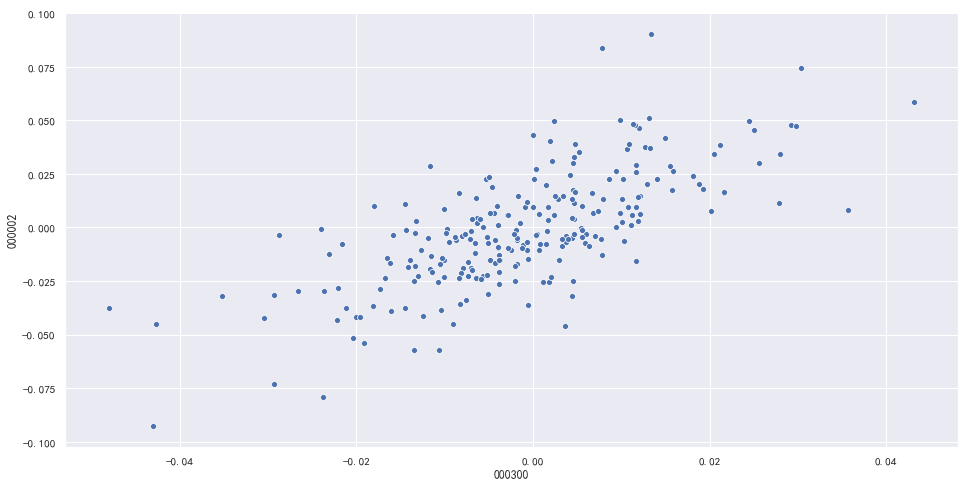

In [21]:
# 绘制 000002 相对于 000300 的散点图
sns.scatterplot(x="000300", y="000002",data=daily_return)

## 贝他值（ β 值）：

用以衡量基金之市场风险，或称系统性风险。其计算的方式为以过去12个月或24个月之基金月报酬率对同期市场月报酬率做回归，估计斜率系数而得。

* 当 β >1（β < -1），表示基金坡动度较指数为大，当指数上扬 10%（下跌10%），基金会上扬超过 10%（下跌超过10%）；

* 当 β = 1，表示指数涨跌多少，基金就跟着变动多少。

[Beta系数](zh.wikipedia.org/wiki/Beta%E7%B3%BB%E6%95%B0)

**贝塔系数越高，投资该股的系统风险越高，投资者所要求的回报率也就越高。**

* 如果贝塔系数的绝对值=1，表明资产的风险与市场相同；
* 如果贝塔系数的绝对值>1，表明资产的风险比市场高；
* 如果贝塔系数的绝对值<1，表明资产的风险比市场低；
* 如果贝塔系数的绝对值=0，表明资产没有系统性风险。

## 阿尔法系数（ α）

是基金的实际收益和按照β系数计算的期望收益之间的差额。

其计算方法如下：超额收益是基金的收益减去无风险投资收益（在中国为1年期银行定期存款收益）；期望收益是贝塔系数 β 和市场收益的乘积，反映基金由于市场整体变动而获得的收益；超额收益和期望收益的差额即 α 系数。**该系数越大越好。**

[阿尔法系数](zh.wikipedia.org/wiki/%E8%AF%81%E5%88%B8%E6%8A%95%E8%B5%84%E5%9F%BA%E9%87%91#%E9%98%BF%E5%B0%94%E6%B3%95%E7%B3%BB%E6%95%B0)

In [24]:
# beta系数和alpha系数
beta, alpha = np.polyfit(daily_return['000300'], daily_return['000002'], 1)
beta, alpha

(1.4074809223966045, 0.0007167083979268613)

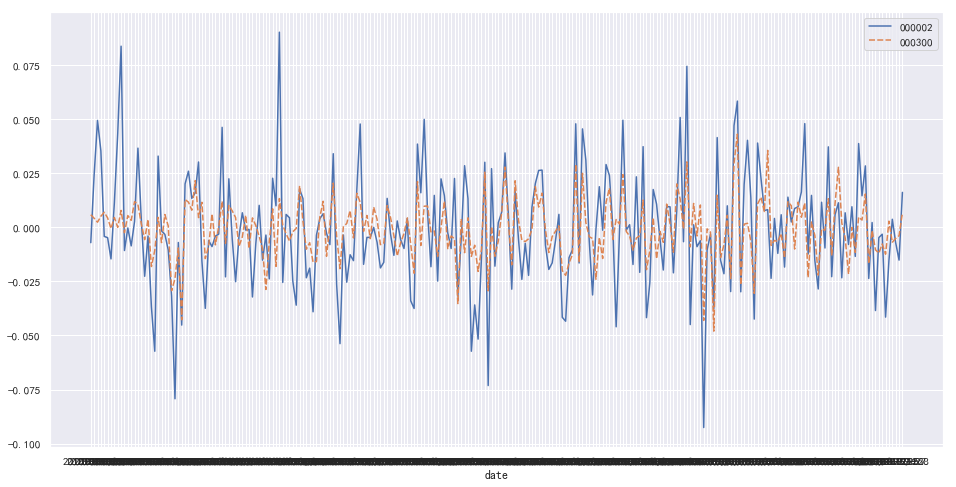

In [27]:
#beta系数大于1。通过下图明显看出000002的波动性比000300更大
sns.lineplot(data=daily_return)

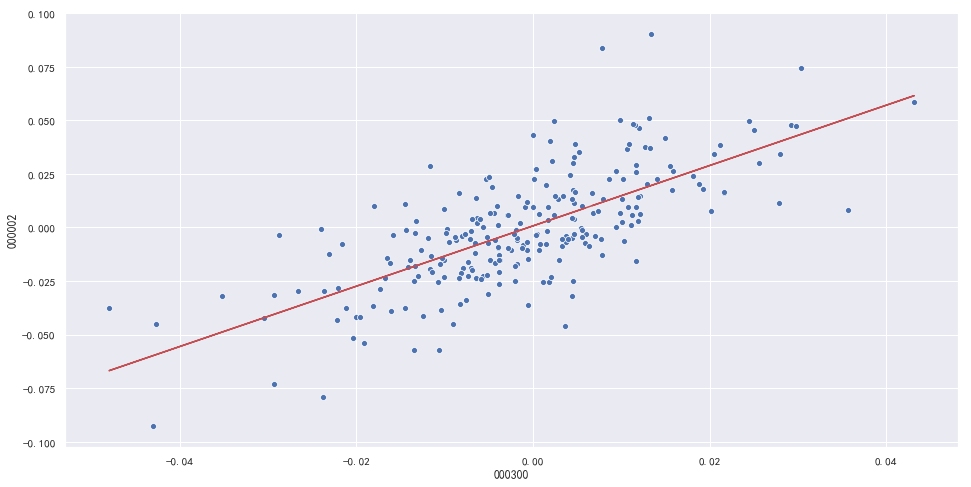

In [26]:
# 绘制 000002 相对于 000300 的散点图
sns.scatterplot(x="000300", y="000002",data=daily_return)
# 绘制拟合线
plt.plot(daily_return['000300'], beta * daily_return['000300'] + alpha, '-', color='r')